In [1]:
from mountain import Mountain_one, Mountain_two

import numpy as np
from typing import Tuple
import os
import matplotlib.pyplot as plt 

adad c:\Users\kasgr\OneDrive\Dokumenter\Master i Informatikk\INF266\GITproject2\inf266_problem_set_2


In [36]:
def policy_evaluation(env, policy, V, theta=1e-6, gamma=1.0, order="left-right"):
    states = sorted(V.keys(), key=lambda x: x[1]) if order == "left-right" else sorted(V.keys(), key=lambda x: -x[1])
    iteration = 0
    while True:
        iteration += 1
        delta = 0
        for state in states:
            action = policy[state]
            next_state = env.next_state(state, action)
            reward = env.get_reward(state, action)

            if next_state not in V:
                V[next_state] = 0  # Initialize if missing

            new_value = reward + gamma * V[next_state]
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value
        
        if delta < theta:
            print(f"Converged at iteration {iteration}, Order: {order}")
            break

    # Convert V to matrix representation
    V_matrix = np.zeros((31, 100))
    for (i, j), value in V.items():
        if 0 <= i < 31 and 0 <= j < 100:  # Ensure indices are valid
            V_matrix[i, j] = value

    return V, V_matrix

In [37]:
def straight_forward_policy(state):
    return "forward"


In [38]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
V = { (i, j): 0 for i in range(31) for j in range(100) }
V_pi_str,V_pi_str_matrix = policy_evaluation(env, policy,V)

print("Value function for π_str computed.")

Converged at iteration 99, Order: left-right
Value function for π_str computed.


In [39]:
# Compare values
V = { (i, j): 0 for i in range(31) for j in range(100) }
V_left_right,_ = policy_evaluation(env, policy,V, order="left-right")
print(f"Final Value at (15,0) - Left-to-Right: {V_left_right[(15,0)]}")

Converged at iteration 99, Order: left-right
Final Value at (15,0) - Left-to-Right: -57.80784459


In [40]:
V = { (i, j): 0 for i in range(31) for j in range(100) }
V_right_left,_ = policy_evaluation(env, policy,V, order="right-left")
print(f"Final Value at (15,0) - Right-to-Left: {V_right_left[(15,0)]}")

Converged at iteration 2, Order: right-left
Final Value at (15,0) - Right-to-Left: -57.80784459


## Consider the two polices evaluation in run with the different ordering of states. Did you learn something different between them?
The two value functions are the same, but the order in which the states are evaluated does affect the number of iterations required to converge. For the left to right, the policy converged after 98 iterations, while from right only required 10 iterations


In [45]:
def policy_iteration(env, V, gamma=1.0, max_iterations=1000):
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }
    iterations = 0

    while True:
        # Policy Evaluation
        V, _ = policy_evaluation(env, policy, V, gamma=gamma)
        policy_stable = True

        for state in V:
            # Ensure policy[state] exists
            if state not in policy:
                continue  # Skip states not in policy

            # Get possible actions for the state
            possible_actions = env.get_actions(state) if hasattr(env, "get_actions") else env.actions

            # Compute the best action
            best_action = max(possible_actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])

            # Update policy if the best action is different
            if best_action != policy[state]:
                policy_stable = False
                policy[state] = best_action

        iterations += 1

        # Stop if the policy is stable or we reach the iteration limit
        if policy_stable or iterations >= max_iterations:
            if iterations >= max_iterations:
                print("Warning: Policy Iteration reached max iterations.")
            break

    return policy, V, iterations


In [50]:
def truncated_policy_iteration(env, V, gamma=1.0, max_iterations=1000, k=3):
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }
    iterations = 0

    while True:
        # Perform only k steps of policy evaluation
        for _ in range(k):  # Perform k steps of policy evaluation
            V, _ = policy_evaluation(env, policy, V, gamma=gamma)

        policy_stable = True
        for state in V:
            if state not in policy:
                continue  # Skip states not in policy

            possible_actions = env.get_actions(state) if hasattr(env, "get_actions") else env.actions
            best_action = max(possible_actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])

            if best_action != policy[state]:
                policy_stable = False
                policy[state] = best_action

        iterations += 1
        if policy_stable or iterations >= max_iterations:
            if iterations >= max_iterations:
                print("Warning: Truncated Policy Iteration reached max iterations.")
            break

    return policy, V, iterations


In [51]:
env = Mountain_one()
V = { (i, j): 0 for i in range(31) for j in range(100) }
optimal_Ppolicy, V_Popt, num_Piterations = policy_iteration(env,V)

print("Optimal policy computed using policy iteration.")
print(f"Number of iterations: {num_Piterations}")


Converged at iteration 99, Order: left-right
Converged at iteration 98, Order: left-right
Converged at iteration 93, Order: left-right
Converged at iteration 93, Order: left-right
Converged at iteration 90, Order: left-right
Converged at iteration 76, Order: left-right
Converged at iteration 74, Order: left-right
Converged at iteration 25, Order: left-right
Converged at iteration 11, Order: left-right
Converged at iteration 2, Order: left-right
Converged at iteration 3, Order: left-right
Optimal policy computed using policy iteration.
Number of iterations: 11


In [52]:
env = Mountain_one()
V = { (i, j): 0 for i in range(31) for j in range(100) }
optimal_TPpolicy, V_TPopt, num_TPiterations = truncated_policy_iteration(env,V, gamma=1.0, k=3)

print("Optimal policy computed using policy iteration.")
print(f"Number of iterations: {num_TPiterations}")

Converged at iteration 99, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 98, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 93, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 93, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 90, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 76, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 74, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 1, Order: left-right
Converged at iteration 25, Order: left-right
Converged at iteration 1

In [16]:
def value_iteration(env, theta=1e-6, gamma=1.0):
    """
    Computes the optimal policy using Value Iteration.
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    iteration = 0
    while True:
        iteration += 1
        delta = 0
        for state in V:
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                best_value = max(best_value, value)

            delta = max(delta, abs(best_value - V[state]))
            V[state] = best_value
        
        if delta < theta:
            break  # Convergence check

    # Extract optimal policy
    optimal_policy = {}
    for state in V:
        best_action = max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])
        optimal_policy[state] = best_action

    return optimal_policy, V,iteration

In [17]:
env = Mountain_one()
optimal_policy_vi, V_vi,v_vi_num_iterations = value_iteration(env)

print("Optimal policy computed using value iteration.")
print(f"Number of iterations: {v_vi_num_iterations}")

Optimal policy computed using value iteration.
Number of iterations: 91


In [12]:
opt, opt_m = policy_evaluation(env, optimal_policy_vi)
print(opt[(15,0)])

Iteration 1, Order: left-right, Value at (15,0): -0.3137255
Iteration 2, Order: left-right, Value at (15,0): -0.76862746
Iteration 3, Order: left-right, Value at (15,0): -1.2117647200000001
Iteration 4, Order: left-right, Value at (15,0): -1.6431372999999998
Iteration 5, Order: left-right, Value at (15,0): -2.0705883
Iteration 6, Order: left-right, Value at (15,0): -2.4980393
Iteration 7, Order: left-right, Value at (15,0): -2.8705882999999996
Iteration 8, Order: left-right, Value at (15,0): -3.19215694
Iteration 9, Order: left-right, Value at (15,0): -3.4862746
Iteration 10, Order: left-right, Value at (15,0): -3.75294128
Iteration 11, Order: left-right, Value at (15,0): -4.04705894
Iteration 12, Order: left-right, Value at (15,0): -4.368627580000001
Iteration 13, Order: left-right, Value at (15,0): -4.6431374000000005
Iteration 14, Order: left-right, Value at (15,0): -4.89019622
Iteration 15, Order: left-right, Value at (15,0): -5.1568629
Iteration 16, Order: left-right, Value at (15

In [13]:
def plot_trajectory(env, policy, start_state):
    state = start_state
    trajectory = [state]
    while state[1] < 99:
        action = policy[state]
        state = env.next_state(state, action)
        trajectory.append(state)
    x_vals, y_vals = zip(*trajectory)
    
    # Plot terrain
    plt.figure(figsize=(10, 5))
    plt.imshow(env.get_map(), cmap='terrain', origin='upper')
    plt.colorbar(label='Roughness')
    
    # Plot trajectory on top
    plt.plot(y_vals, x_vals, marker='o', linestyle='-', color='red', label='Trajectory')
    plt.xlabel("Column (x)")
    plt.ylabel("Row (y)")
    plt.title("Robot Trajectory on Terrain")
    plt.legend()
    plt.show()


starting from (15,0)


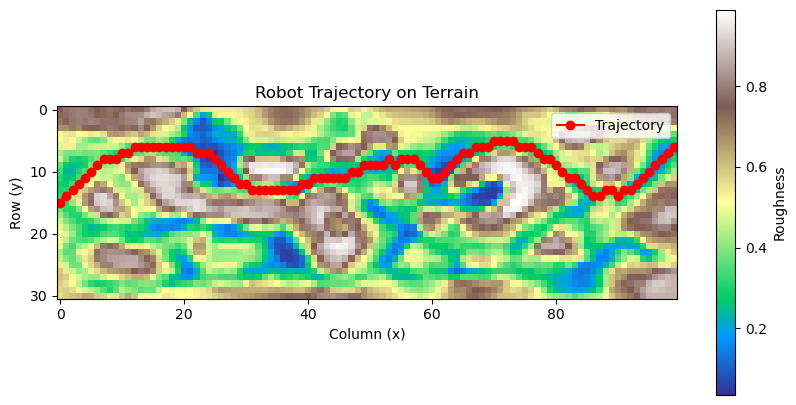

starting from (3,0)


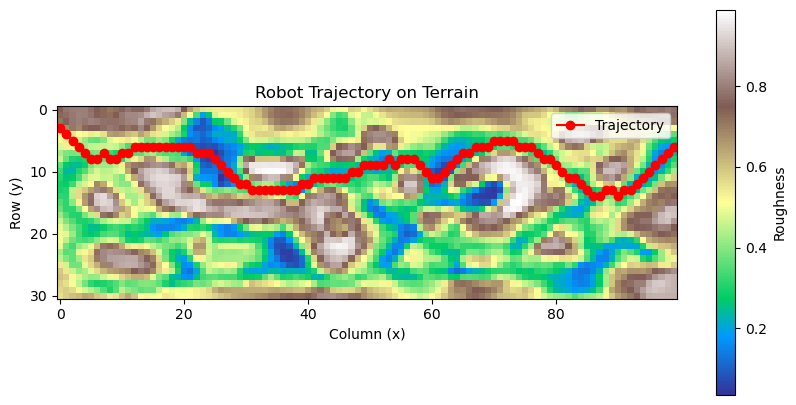

In [14]:
env = Mountain_one()
print("starting from (15,0)")
plot_trajectory(env, optimal_policy, (15, 0))  # Start from (15,0)
print("starting from (3,0)")
plot_trajectory(env, optimal_policy, (3, 0))   # Start from (3,0)

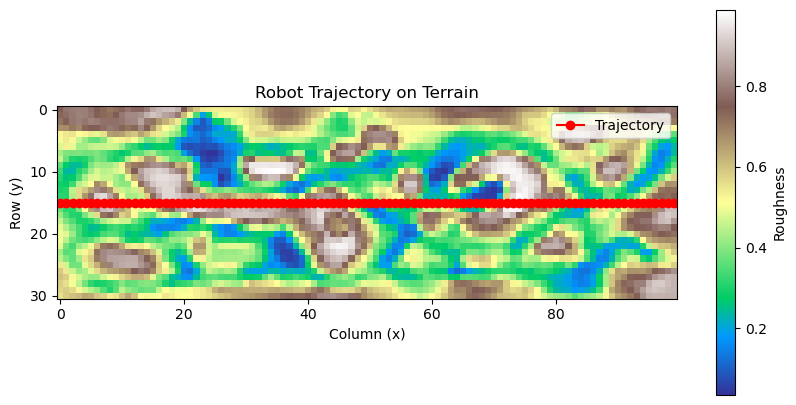

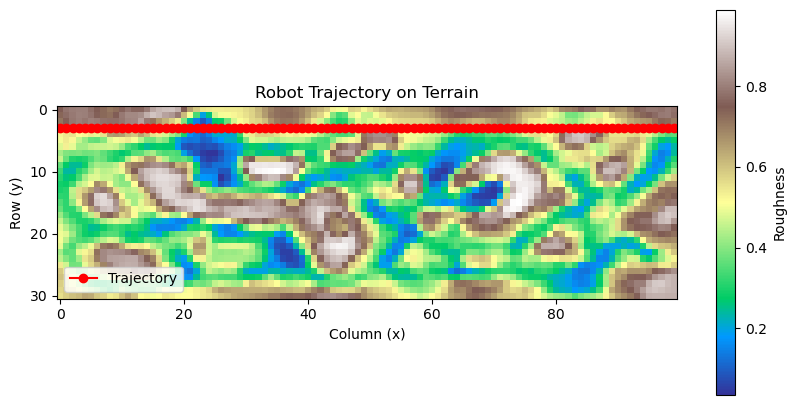

In [15]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }

plot_trajectory(env, policy, (15, 0))  # Start from (15,0)
plot_trajectory(env, policy, (3, 0))   # Start from (3,0)


# best start row

In [16]:
#iterate the different rows, 

def find_best_row(env,policy):

    num_rows = np.shape(env.get_map())[0]
    best_row = None
    best_value = float('-inf')
    val,_ = policy_evaluation(env, policy, order="left-right")
    for row in range(num_rows):
        v =  val[(row,0)] 
        if v > best_value:
            best_value = v
            best_row = row
    return best_row, best_value

env = Mountain_one()


Iteration 1, Order: left-right, Value at (15,0): -0.31764707
Iteration 2, Order: left-right, Value at (15,0): -0.72156864
Iteration 3, Order: left-right, Value at (15,0): -1.25098044
Iteration 4, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 5, Order: left-right, Value at (15,0): -2.6745098
Iteration 6, Order: left-right, Value at (15,0): -3.58039216
Iteration 7, Order: left-right, Value at (15,0): -4.50980386
Iteration 8, Order: left-right, Value at (15,0): -5.42745096
Iteration 9, Order: left-right, Value at (15,0): -6.25490196
Iteration 10, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 11, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 12, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 13, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 14, Order: left-right, Value at (15,0): -8.81568639
Iteration 15, Order: left-right, Value at (15,0): -9.43529429
Iteration 16, Order: left-right, Value at (1

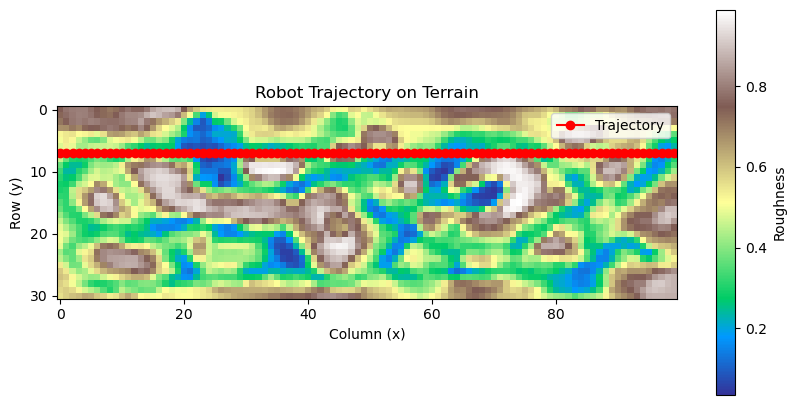

In [17]:
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
env = Mountain_one()

row, val, = find_best_row(env, policy)
plot_trajectory(env, policy, (row, 0))  # Start from best row

In [18]:
print(f"Best row: {row}, Value: {val}")

Best row: 7, Value: -35.72156986299999


Iteration 1, Order: right-left, Value at (15,0): -56.83921714999999
Converged at iteration 2, Order: right-left


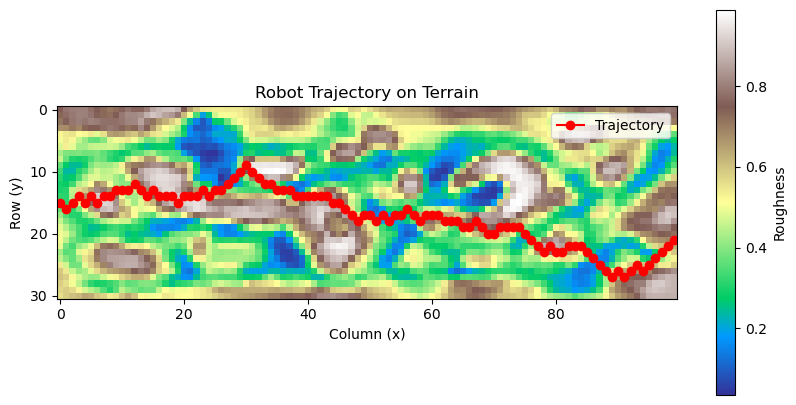

In [19]:
#Random policy
np.random.seed(42)
policy = { (i, j): np.random.choice(env.actions) for i in range(31) for j in range(100) }
env = Mountain_one()
#Check the policy evaluation
v_pi_rnd, rnd_mat = policy_evaluation(env, policy, order="right-left")
plot_trajectory(env, policy, (15, 0))  # Start from (15,0)

In [20]:
#v_pi_rnd (15,0) V_pi_str (15,0) ,(3,0)
print(f"Value at (15,0) - Random Policy: {v_pi_rnd[(15,0)]}")
print(f"Value at (15,0) - Straight-Forward Policy: {V_pi_str[(15,0)]}")
print(f"Value at (3,0) - Straight-Forward Policy: {V_pi_str[(3,0)]}")

Value at (15,0) - Random Policy: -56.83921714999999
Value at (15,0) - Straight-Forward Policy: -57.80784459
Value at (3,0) - Straight-Forward Policy: -52.796080069999995


In [21]:

#write the matrix to a file
np.savetxt("value_matrix_random.txt", rnd_mat, fmt='%.2f')
np.savetxt("value_matrix_straight.txt", V_pi_str_matrix, fmt='%.2f')


In [22]:
# compare the mean of the  matrices
print(f"Mean of Random Policy Value Matrix: {np.mean(rnd_mat)}")
print(f"Mean of Straight-Forward Policy Value Matrix: {np.mean(V_pi_str_matrix)}")
print(f"Mean of Straight-Forward Policy Value Matrix: {np.mean(opt_m)}")


Mean of Random Policy Value Matrix: -25.346356238311934
Mean of Straight-Forward Policy Value Matrix: -24.374858449152576
Mean of Straight-Forward Policy Value Matrix: -11.579331224987095


In [23]:
env = Mountain_one()
optimal_policy_pi, V_pi, iters_pi = policy_iteration(env)
optimal_policy_tpi, V_tpi, iters_tpi = truncated_policy_iteration(env, k=1)
optimal_policy_vpi, V_vpi, iters_vpi = value_iteration(env)



Iteration 1, Order: left-right, Value at (15,0): -0.31764707
Iteration 2, Order: left-right, Value at (15,0): -0.72156864
Iteration 3, Order: left-right, Value at (15,0): -1.25098044
Iteration 4, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 5, Order: left-right, Value at (15,0): -2.6745098
Iteration 6, Order: left-right, Value at (15,0): -3.58039216
Iteration 7, Order: left-right, Value at (15,0): -4.50980386
Iteration 8, Order: left-right, Value at (15,0): -5.42745096
Iteration 9, Order: left-right, Value at (15,0): -6.25490196
Iteration 10, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 11, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 12, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 13, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 14, Order: left-right, Value at (15,0): -8.81568639
Iteration 15, Order: left-right, Value at (15,0): -9.43529429
Iteration 16, Order: left-right, Value at (1

In [24]:
vpi, mpi = policy_evaluation(env, optimal_policy_pi)
vpi, mtpi = policy_evaluation(env, optimal_policy_tpi)
vpi, mvpi = policy_evaluation(env, optimal_policy_vpi)

Iteration 1, Order: left-right, Value at (15,0): -0.3137255
Iteration 2, Order: left-right, Value at (15,0): -0.76862746
Iteration 3, Order: left-right, Value at (15,0): -1.2117647200000001
Iteration 4, Order: left-right, Value at (15,0): -1.6431372999999998
Iteration 5, Order: left-right, Value at (15,0): -2.0705883
Iteration 6, Order: left-right, Value at (15,0): -2.4980393
Iteration 7, Order: left-right, Value at (15,0): -2.8705882999999996
Iteration 8, Order: left-right, Value at (15,0): -3.19215694
Iteration 9, Order: left-right, Value at (15,0): -3.4862746
Iteration 10, Order: left-right, Value at (15,0): -3.75294128
Iteration 11, Order: left-right, Value at (15,0): -4.04705894
Iteration 12, Order: left-right, Value at (15,0): -4.368627580000001
Iteration 13, Order: left-right, Value at (15,0): -4.6431374000000005
Iteration 14, Order: left-right, Value at (15,0): -4.89019622
Iteration 15, Order: left-right, Value at (15,0): -5.1568629
Iteration 16, Order: left-right, Value at (15

In [25]:
print(f"Standard Policy Iteration took {iters_pi} iterations.")
print(f"Truncated Policy Iteration (k=1) took {iters_tpi} iterations.")
print(f"Value Iteration took {iters_vpi} iterations.")
print()
print()
print(f"Value at (15,0) - Standard Policy Iteration: {V_pi[(15,0)]}")
print(f"Value at (15,0) - Truncated Policy Iteration: {V_tpi[(15,0)]}")
print(f"Value at (15,0) - Value Iteration: {V_vpi[(15,0)]}")
print()
print()
print(f"Mean of Standard Policy Iteration Value Matrix: {np.mean(mpi)}")
print(f"Mean of Truncated Policy Iteration Value Matrix: {np.mean(mtpi)}")
print(f"Mean of Value Iteration Value Matrix: {np.mean(mvpi)}")


Standard Policy Iteration took 11 iterations.
Truncated Policy Iteration (k=1) took 61 iterations.
Value Iteration took 91 iterations.


Value at (15,0) - Standard Policy Iteration: -22.435294938
Value at (15,0) - Truncated Policy Iteration: -13.619608352000002
Value at (15,0) - Value Iteration: -22.435294938


Mean of Standard Policy Iteration Value Matrix: -11.579331224987095
Mean of Truncated Policy Iteration Value Matrix: -11.581033944873548
Mean of Value Iteration Value Matrix: -11.579331224987095


In [50]:
def policy_iteration(env, gamma=1.0):
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    iterations = 0
    while True:
        V,_ = policy_evaluation(env, policy, gamma=gamma)
        policy_stable = True
        for state in V:
            best_action = max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])
            if best_action != policy[state]:
                policy_stable = False
                policy[state] = best_action
        iterations += 1
        if policy_stable:
            break
    return policy, V, iterations

def truncated_policy_iteration(env, gamma=1.0, k=3):
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    iterations = 0
    while True:
        for _ in range(k):
            new_V = V.copy()
            for state in V:
                action = policy[state]
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                new_V[state] = reward + gamma * V[next_state]
            V = new_V
        policy_stable = True
        for state in V:
            best_action = max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])
            if best_action != policy[state]:
                policy_stable = False
                policy[state] = best_action
        iterations += 1
        if policy_stable:
            break
    return policy, V, iterations

def value_iteration(env, gamma=1.0, theta=1e-6):
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    iterations = 0
    while True:
        delta = 0
        for state in V:
            best_value = max(env.get_reward(state, a) + gamma * V[env.next_state(state, a)] for a in env.actions)
            delta = max(delta, abs(best_value - V[state]))
            V[state] = best_value
        iterations += 1
        if delta < theta:
            break
    policy = { state: max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)]) for state in V }
    return policy, V, iterations




In [51]:
env = Mountain_one()
optimal_policy_pi, V_pi, iters_pi = policy_iteration(env)
optimal_policy_tpi, V_tpi, iters_tpi = truncated_policy_iteration(env, k=3)
optimal_policy_vi, V_vi, iters_vi = value_iteration(env)


Iteration 1, Order: left-right, Value at (15,0): -0.31764707
Iteration 2, Order: left-right, Value at (15,0): -0.72156864
Iteration 3, Order: left-right, Value at (15,0): -1.25098044
Iteration 4, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 5, Order: left-right, Value at (15,0): -2.6745098
Iteration 6, Order: left-right, Value at (15,0): -3.58039216
Iteration 7, Order: left-right, Value at (15,0): -4.50980386
Iteration 8, Order: left-right, Value at (15,0): -5.42745096
Iteration 9, Order: left-right, Value at (15,0): -6.25490196
Iteration 10, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 11, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 12, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 13, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 14, Order: left-right, Value at (15,0): -8.81568639
Iteration 15, Order: left-right, Value at (15,0): -9.43529429
Iteration 16, Order: left-right, Value at (1

In [52]:
print(f"Standard Policy Iteration took {iters_pi} iterations.")
print(f"Truncated Policy Iteration (k=1) took {iters_tpi} iterations.")
print(f"Value Iteration took {iters_vi} iterations.")
print()
# Print values for (15,0) in each approach
print(f"Value at (15,0) - Standard Policy Iteration: {V_pi[(15,0)]}")
print(f"Value at (15,0) - Truncated Policy Iteration: {V_tpi[(15,0)]}")
print(f"Value at (15,0) - Value Iteration: {V_vi[(15,0)]}")
print()
# Print mean of value matrices
mean_pi = sum(V_pi.values()) / len(V_pi)
mean_tpi = sum(V_tpi.values()) / len(V_tpi)
mean_vi = sum(V_vi.values()) / len(V_vi)
print(f"Mean of Standard Policy Iteration Value Matrix: {mean_pi}")
print(f"Mean of Truncated Policy Iteration Value Matrix: {mean_tpi}")
print(f"Mean of Value Iteration Value Matrix: {mean_vi}")


Standard Policy Iteration took 11 iterations.
Truncated Policy Iteration (k=1) took 31 iterations.
Value Iteration took 91 iterations.

Value at (15,0) - Standard Policy Iteration: -22.435294938
Value at (15,0) - Truncated Policy Iteration: -21.172549784999998
Value at (15,0) - Value Iteration: -22.435294938

Mean of Standard Policy Iteration Value Matrix: -11.579331224987108
Mean of Truncated Policy Iteration Value Matrix: -11.545197130006136
Mean of Value Iteration Value Matrix: -11.579331224987108


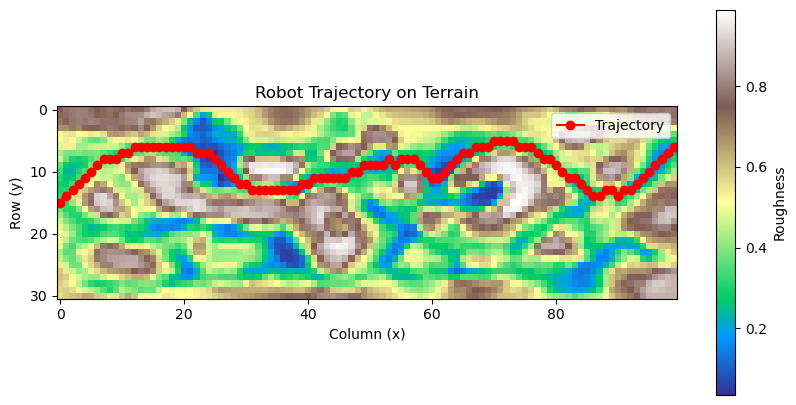

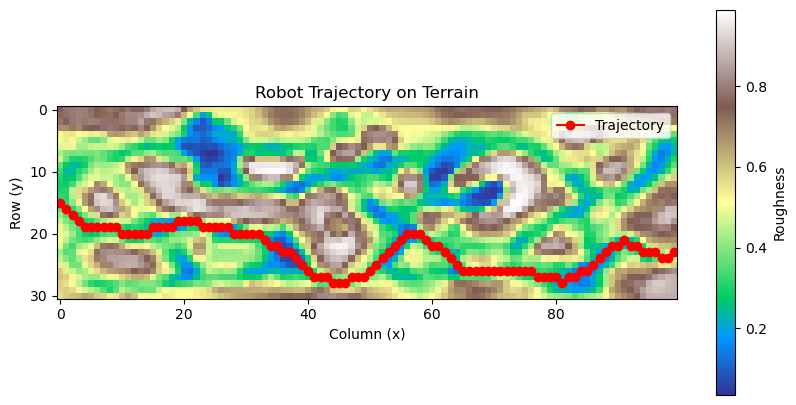

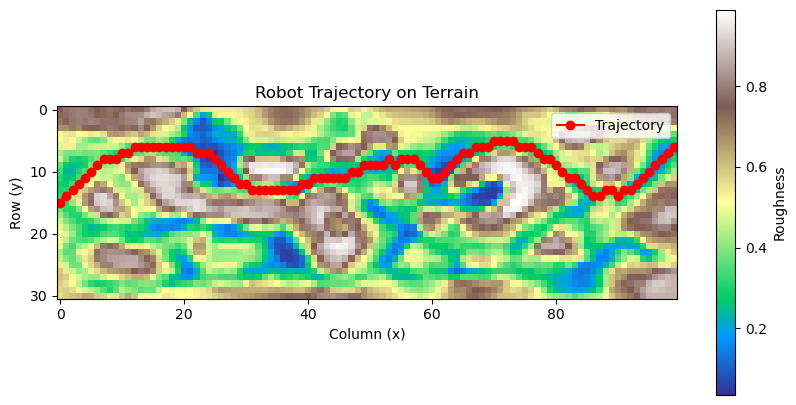

In [53]:
plot_trajectory(env, optimal_policy_pi, (15, 0))  # Start from (15,0)
plot_trajectory(env, optimal_policy_tpi, (15, 0))  # Start from (15,0)
plot_trajectory(env, optimal_policy_vi, (15, 0))  # Start from (15,0)



In [47]:
_,_, = policy_evaluation(env, optimal_policy_pi, order="right-left")

Iteration 1, Order: right-left, Value at (15,0): -22.435294938
Converged at iteration 2, Order: right-left


In [48]:
_,_, =policy_evaluation(env, optimal_policy_tpi, order="right-left")

Iteration 1, Order: right-left, Value at (15,0): -22.701961604999994
Converged at iteration 2, Order: right-left


In [49]:
_,_, =policy_evaluation(env, optimal_policy_vi, order="right-left")

Iteration 1, Order: right-left, Value at (15,0): -22.435294938
Converged at iteration 2, Order: right-left
